# CH02. 사이킷런으로 시작하는 머신러닝
---
## 01. 첫 번째 머신러닝 - 붓꽃 품종 예측하기 
---
- 붓꽃 데이터 세트는 꽃잎의 길이와 너비, 꽃받침의 길이와 너비 피처를 기반으로 꽃의 품종을 예측하기 위한 것임. 
- 분류(Classification)는 대표적인 지도학습(Supervised Learning) 방법의 하나이다. 지도학습은 학습을 위한 다양한 피처와 분류 결정값인 레이블(Label) 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 미지의 정답을 예측하는 방식이다. 

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# 붓꽃 데이터 세트 로딩
iris = load_iris()

# iris.data는 Iris 데이터 세트에서 피처(Feature)만으로 된 데이터를 numpy로 가지고 있음
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블 데이터를 numpy로 가지고 있음
iris_label = iris.target
print(iris_label)
print(iris.target_names)

# 데이터 세트를 DataFrame으로 변환
iris_df = pd.DataFrame(iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


피처에는 sepal length, sepal width, petal length, petal width가 있음. 레이블은 0, 1, 2 세가지 값으로 돼 있으며 0이 Setosa, 1이 versicolor, 2가 virginica 품종을 의미함.

In [3]:
# 학습용 데이터와 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, 
                                                   test_size=0.2, random_state=11)

- 의사 결정 트리를 이용해 학습과 예측을 수행하기

In [8]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행
dt_clf.fit(X_train, y_train)

# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)

- 예측 결과를 기반으로 예측 성능을 평가해보기
  - 정확도를 측정해보기: 예측 결과가 실제 레이블 값과 얼마나 정확하게 맞는지를 평가하는 지표 
    - accuracy_score() 함수 사용

In [9]:
# 예측 성능 평가 - 정확도
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

0.9333333333333333


-> 학습한 의사 결정 트리의 알고리즘 예측 정확도가 약 93.33%로 측정됨

## 2) Model Selection 모듈 소개
---
### 학습/테스트 데이터 세트 분리 - train_test_split()
### 교차 검증
- 알고리즘을 학습시키는 학습 데이터와 이에 대한 예측 성능을 평가하기 위한 별도의 테스트용 데이터를 사용하여도 과적합(overfitting)에 취약한 약점을 가질 수 있다. 고정된 학습 데이터와 테스트 데이터로 평가를 하다보면 테스트 데이터에만 최적의 성능을 발휘할 수 있도록 편향되게 모델을 유도하는 경향이 생기게 된다. 결국은 해당 테스트 데이터에만 과적합되는 학습 모델이 만들어져 다른 테스트용 데이터가 들어올 경우에는 성능이 저하된다. 이런 문제점을 개선하기 위해 교차 검증을 이용해 더 다양한 학습과 평가를 수행한다. 
- 교차 검증은 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것이다. 그리고 각 세트에서 수행한 평가 결과에 따라 하이퍼 파라미터 튜닝 등의 모델 최적화를 더욱 손쉽게 할 수 있다.
#### - K 폴드 교차 검증
K 개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행하는 방법이다. K개의 예측 평가를 구했으면 이를 평균해서 K 폴드 평가 결과로 반영한다.
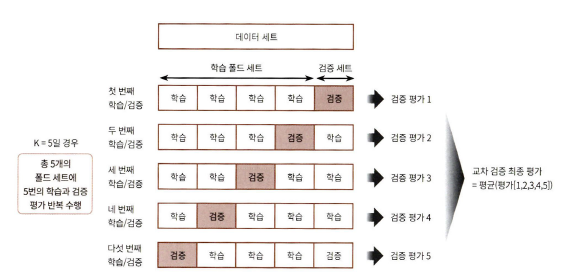
#### - Stratified K 폴드
불균형한(imbalance) 분포도를 가진 레이블 데이터 집합을 위한 K 폴드 방식이다. K 폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우의 문제를 해결해준다. 원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배한다. 일반적으로 분류에서의 교차 검증은 K 폴드가 아닌 Stratified K 폴드로 분할돼야 한다.
#### - cross_val_score
교차 검증을 편리하게 수행할 수 있게 해준다. 분류인 경우엔 Stratified K 폴드 방식으로 레이블값의 분포에 따라 학습/테스트 세트를 분할한다. 회귀인 경우는 Stratified K 폴드 방식으로 분할할 수 없으므로 K 폴드 방식으로 분할한다. cross_val_score()는 cv로 지정된 횟수만큼 scoring 파라미터로 지정된 평가 지표로 평가 결과값을 배열로 반환한다. 그리고 일반적으로 이를 평균해 평가 수치로 사용한다. API 내부에서 학습, 예측, 평가시켜준다.             

> ```cross_val_score(estimator, X, y=None, scoring=None, cv=None)```             

- estimator는 Classifier 또는 Regressor, X는 피처 데이터 세트, y는 레이블 데이터 세트, scoring은 예측 성능 평가 지표, cv는 교차 검증 폴드 수를 의미한다.

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris
import numpy as np

iris_data = load_iris()
data = iris_data.data
label = iris_data.target

dt_clf = DecisionTreeClassifier(random_state=156)

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


## 3) GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝
---
```
grid_parameters = {'max_depth': [1, 2, 3],
                   'min_samples_split': [2, 3]
                   }
```
### GridSearchCV 의 주요 파라미터
- estimator: classifier, regresesor, pipeline이 사용될 수 있다.
- param_grid: key+리스트 값을 가지는 딕셔너리가 주어진다.
- scoring: 예측 성능을 측정할 평가 방법을 지정한다.
- cv: 교차 검증을 위해 분할되는 학습/테스트 세트의 개수를 지정한다.
- refit: 디폴트가 True이며 True로 생성시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습시킨다.


In [7]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터 로딩하고 학습/테스트 데이터 분리 
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                   test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

# 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth':[1, 2, 3], 'min_samples_split':[2, 3]}

In [8]:
# param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 설정
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)
grid_dtree.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]})

- GridSearchCV 객체의 fit()을 수행하면 최고 성능을 나타낸 하이퍼 파라미터의 값과 그때의 평가 결과 값이 각각 best_params_, best_score_ 속성에 기록됨.

In [9]:
print(grid_dtree.best_params_)
print(grid_dtree.best_score_)

{'max_depth': 3, 'min_samples_split': 2}
0.975


-> 평균 최고 정확도가 약 97.5% 나옴

- GridSearchCV 객체의 생성 파라미터로 refit=True가 디폴트인데, 이는 최적 성능을 나타내는 하이퍼 파라미터로 Estimator를 학습해 best_estimator_로 저장한다. 이미 학습된 best_estimator_를 이용해 앞에서 train_test_split()으로 분리한 테스트 데이터 세트에 대해 예측하고 성능을 평가해보자.

In [11]:
from sklearn.metrics import *

# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print(accuracy_score(y_test, pred))

0.9666666666666667


-> 별도의 테스트 데이터 세트로 정확도를 측정한 결과 약 96.7%의 정확도가 나옴

## 02. 데이터 전처리
---
- Null 값이 대부분이라면 해당 피처는 드롭하는 것이 좋다. Null 값이 일정 수준된다면 대체값에 대한 고려가 필요하다.    - 카테고리형 피처는 코드 값으로 표현하는게 더 이해하기 쉽다. 텍스트형 피처는 피처 벡터화(feature vectorization) 등의 기법으로 벡터화하거나 불필요한 피처라고 판단되면 삭제하는 것이 좋다. 
### 01) 데이터 인코딩
### - 레이블 인코딩
카테고리 피처를 코드형 숫자 값으로 변환하는 것이다. 레이블 인코딩은 일괄적인 숫자 값으로 변환이 되면서 몇몇 알고리즘에서는 예측 성능이 떨어질 수 있다. 숫자 값의 크고 작음에 대한 특성이 작용하기 때문이다. 1보다 2로 변환된 피처가 특정 ML 알고리즘에서 가중치가 더 부여되거나 더 중요하게 인식할 가능성이 발생한다. 이러한 특성 때문에 레이블 인코딩은 선형 회귀와 같은 ML 알고리즘에는 적용하지 않아야 한다. 트리 계열의 ML 알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 레이블 인코딩도 별 문제가 없다.


In [12]:
from sklearn.preprocessing import LabelEncoder

items = ['spring', 'summer', 'fall', 'winter']

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print(labels)

[1 2 0 3]


-> spring은 1, summer는 2, fall은 0, winter은 3으로 변환됨

### - 원-핫 인코딩(One-Hot Encoding)
원-핫 인코딩은 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방법이다. LabelEncoder와 다르게 주의할 점이 있다. **첫번째는 OneHotEncoder로 변환하기 전에 모든 문자열 값이 숫자형 값으로 변환돼야한다. 두번째는 입력 값으로 2차원 데이터가 필요하다는 점이다. 판다스의 get_dummies 사용할 경우엔 숫자 변환 없이 바로 가능하다!**

In [17]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['spring', 'summer', 'fall', 'winter']

# 먼저 숫자 값으로 변환을 위해 LabelEncoder로 변환함
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
# 2차원 데이터로 변환함
labels = labels.reshape(-1, 1)

# 원-힛 인코딩을 적용함
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print(oh_labels.toarray())

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


In [19]:
# get_dummies 사용 
import pandas as pd

df = pd.DataFrame({'items' : ['spring', 'summer', 'fall', 'winter']})
pd.get_dummies(df)

,items_fall,items_spring,items_summer,items_winter
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1


### 2) 피처 스케일링과 정규화
- 피처 스케일링: 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업
  > - 표준화(Standardization): 피처의 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것
  > 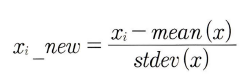
  > - 정규화(Normalization): 개별 데이터의 크기를 모두 똑같은 단위로 변경하는 것
  > 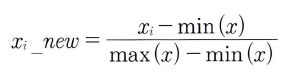
  > - 벡터 정규화: 사이킷런에서 제공하는 Normalizer 모듈은 선형대수에서의 정규화 개념이 적용됐으며, 개별 벡터의 크기를 맞추기 위해 변환하는 것을 의미함. 개별 벡터를 모든 피처 벡터의 크기로 나눠줌.
  > 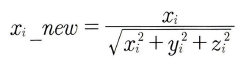

### - StandardScaler
표준화를 지원하는 클래스임. 개별 피처를 평균이 0이고, 분산이 1인 값으로 변환해줌. 이렇게 **가우시안 정규 분포를 가질 수 있도록 데이터를 변환하는 것은 서포트 벡터 머신이나 선형 회귀, 로지스틱 회귀와 같이 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현되는 모델을 사용할 때 예측 성능 향상에 중요한 요소가 됨.**

In [20]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 세트룰 로딩하고 DataFrame으로 변환함
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print(iris_df.mean())
print(iris_df.var())

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


- StandardScaler를 이용해 피처를 한번에 표준화

In [22]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# StandardScaler로 데이터 세트 변환. fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

print(iris_scaled.mean())
print(iris_scaled.var())

-1.4684549872375404e-15
1.0


 -> 모든 칼럼 값의 평균이 0에 아주 가까운 값으로, 분산은 1에 아주 가까운 값으로 변환됨

### - MinMaxScaler
데이터값을 0과 1사이의 범위 값으로 변환한다.(음수 값이 있으면 -1에서 1값으로 변환한다). 데이터의 분포가 가우시안 분포가 아닐 경우에 Min, Max Scale을 적용해 볼 수 있다. 

In [23]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

print(iris_scaled.min())
print(iris_scaled.max())

0.0
1.0


-> 모든 피처에 0에서 1 사이의 값으로 변환되는 스케일링이 적용됨

### 3) 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점
Scaler 객체를 이용해 학습 데이터 세트로 fit()과 transform()을 적용하면 테스트 데이터 세트로는 다시 fit()을 수행하지 않고 학습 데이터 세트로 fit()을 수행한 결과를 이용해 transform() 변환을 적용해야한다. 학습 데이터로 fit()이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용해야한다. 
- 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리
- 위 방법이 여의치 않다면 테스트 데이터 변환 시에는 fit()이나 fit_transform()을 적용하지 않고 학습 데이터로 이미 fit()된 Scaler 객체를 이용해 transform()으로 변환

In [24]:
train_array = np.arange(0, 11).reshape(-1, 1)
test_array = np.arange(0, 6).reshape(-1, 1)

scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)

# test_array에 Scale 변환을 할 때는 반드시 fit() 호출하지 않고 transform()만으로 변환해야함 
test_scaled = scaler.transform(test_array)